# Using the OmicsIntegrator Package

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
# Use the following lines to test the basic functionality of the package if developing locally: 
import sys
sys.path.insert(0, "/Users/alex/Documents/OmicsIntegrator2/src")
import graph as oi

# import OmicsIntegrator as oi

In [3]:
interactome_file = "../interactomes/inbiomap.9.12.2016.exp.oi2"
prize_file = "/Users/alex/Documents/abcd1/human_deseq_prizes_200.tsv"
graph = oi.Graph(interactome_file, {'g':5})

In [4]:
graph.prepare_prizes(prize_file)

03:02:18 - OI2: INFO - Duplicated gene symbols in the prize file (we'll keep the max prize):
03:02:18 - OI2: INFO - []
03:02:18 - OI2: INFO - Members of the prize file not present in the interactome:
03:02:18 - OI2: INFO - ['ATP6V0E1', 'CXorf36', 'GLT25D1', 'NORAD', 'TNFSF4']


In [5]:
vertex_indices, edge_indices = graph.pcsf()

In [6]:
len(vertex_indices)

77

In [7]:
forest, augmented_forest = graph.output_forest_as_networkx(vertex_indices, edge_indices)
forest

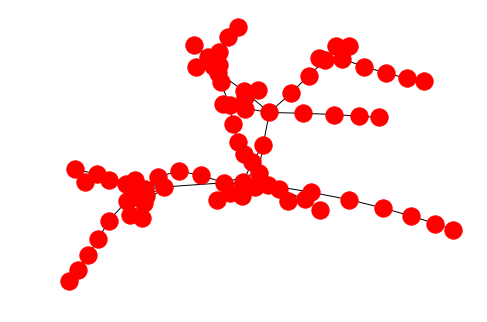

In [8]:
nx.draw_spring(augmented_forest)

In [9]:
graph.pcsf_objective_value(forest)

371.7926050647195

In [10]:
oi.get_networkx_graph_as_dataframe_of_nodes(augmented_forest).head()

,Base_Mean,P_adj,P_value,StdErr,Wald_Stats,betweenness,degree,general_function,general_process,location,log2FC,louvain_clusters,prize,specific_function,specific_process,terminal,type
SCARA3,3190.95,1e-310,1e-309,0.0611261,-37.8121,0.0263158,47,binding,response to stimulus,ER,2.31131,0,3.1,protein binding,response to stress,True,protein
GDF15,1481.45,4.24102e-253,9.87021e-256,0.0835517,34.1589,0,12,binding,biological regulation,extracellular,-2.85403,1,2.52373,protein binding,regulation of biological process,True,protein
EI24,1952.78,1.06316e-211,3.6231e-214,0.0658995,31.2345,0.0519298,7,NaN,biological regulation,ER,-2.05834,2,2.10973,NaN,regulation of biological process,True,protein
ANKRD1,15603.6,1e-310,1e-309,0.0403247,46.4681,0.169474,20,binding,cellular process,nucleus,-1.87382,2,3.1,protein binding,cellular response to stimulus,True,protein
KCNA4,NaN,NaN,NaN,NaN,NaN,0.0484211,18,transporter,localization,plasma_membrane,NaN,3,0,transmembrane transporter,establishment of localization,False,protein


In [12]:
oi.output_networkx_graph_as_interactive_html(augmented_forest, output_dir='/Users/alex/Desktop/')

03:03:01 - OI2: INFO - Inferring display parameters for StdErr
03:03:01 - OI2: INFO - Inferring display parameters for log2FC
03:03:01 - OI2: INFO - Inferring display parameters for Wald_Stats
03:03:01 - OI2: INFO - Inferring display parameters for Base_Mean
03:03:01 - OI2: INFO - Inferring display parameters for P_adj
03:03:01 - OI2: INFO - Inferring display parameters for P_value
03:03:01 - OI2: INFO - Final display parameters:
03:03:01 - OI2: INFO - 
{
    "prize": {
        "display": "color_scale",
        "domain": "[0, 1e-10, 5.517829854063881]",
        "range": "[\"lightgrey\", \"white\", \"red\"]"
    },
    "degree": {
        "display": "color_scale",
        "domain": "[0, 230]",
        "range": "[\"lightblue\", \"red\"]"
    },
    "betweenness": {
        "display": "color_scale",
        "domain": "[0, 0.5398830409356724]",
        "range": "[\"purple\", \"orange\"]"
    },
    "terminal": {
        "display": "color_scale",
        "domain": "[false, true]",
        "

PosixPath('/Users/alex/Desktop/graph.html')